In [1]:
import pandas as pd
import numpy as np
import smogn
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [2]:
import lightgbm as lgb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [3]:
from sklearn.preprocessing import StandardScaler


X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [4]:
y_2_train = np.load('y_2_train.npy')
y_2_test = np.load('y_2_test.npy')
y_3_train = np.load('y_3_train.npy')
y_3_test = np.load('y_3_test.npy')

X_train_class = np.copy(X_train)
y_train_class = np.copy(y_train)
X_test_class = np.copy(X_test)
y_test_class = np.copy(y_test)

scaler = StandardScaler().fit(X_train_class)
X_train_class = scaler.transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [5]:
volume_train = np.load('volume_train.npy') #np.load('volume_train.npy')
volume_test = np.load('volume_test.npy') #np.load('volume_test.npy')
intensity_train = np.load('intensity_train.npy') #np.load('intensity_train.npy')
intensity_test = np.load('intensity_test.npy') #np.load('intensity_test.npy')

In [6]:
# RRegression Values modeifications
#y_2_train[y_2_train > 10] = 10.0
#y_2_test[y_2_test > 10] = 10.0



In [7]:
X_train = np.concatenate((X_train, volume_train.reshape(-1, 1), intensity_train.reshape(-1, 1)), axis=1)
X_test = np.concatenate((X_test,  volume_test.reshape(-1, 1), intensity_test.reshape(-1, 1)), axis=1)

In [8]:
print(X_train.shape, X_test.shape)

(2552, 22) (639, 22)


In [9]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#lgb_train = lgb.Dataset(X_train, y_2_train)


In [11]:
print(X_train)

[[-0.45880693 -0.16513392 -0.03903187 ... -0.39361402  0.72248281
  -0.33515448]
 [ 1.24676524  1.33336874  1.42359704 ... -0.62218796  0.69704086
  -0.60659235]
 [ 1.63051898  1.41899747  1.46661554 ... -0.49299399 -0.49728291
  -0.37044298]
 ...
 [ 0.69245428  0.64833895  0.69228259 ... -0.00603212  0.44179379
  -0.74580612]
 [-0.92783928 -0.97860679 -1.07147581 ...  2.40890126 -0.10509445
  -0.74996961]
 [-1.48215024 -1.83489403 -2.23297523 ...  0.04365787  0.51758002
  -0.01529658]]


In [12]:
'''
polynom_fit_SMOTE_bus,
polynom_fit_SMOTE_star,
ROSE,
Gazzah,
SPY,
MSMOTE,
AHC,
RWO_sampling,
polynom_fit_SMOTE_mesh,
polynom_fit_SMOTE_poly
'''

'\npolynom_fit_SMOTE_bus,\npolynom_fit_SMOTE_star,\nROSE,\nGazzah,\nSPY,\nMSMOTE,\nAHC,\nRWO_sampling,\npolynom_fit_SMOTE_mesh,\npolynom_fit_SMOTE_poly\n'

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=2,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# Classifier Testing

# training the best techniques using the entire dataset
X_samp, y_samp= sv.MSMOTE(proportion=2.5).sample(X_train, y_train)
classifier.fit(X_samp, y_samp)
preds2 = classifier.predict(X_test)
print(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))
preds_train = classifier.predict(X_train)



2022-12-21 14:45:17,854:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 2.5, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-12-21 14:45:17,856:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-12-21 14:45:17,857:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[ 0.22342193  0.04893789 -0.12506886 ... -1.03958385 -0.19804197
  -0.96079723]
 [-1.1410358  -1.10704988 -1.2005313  ... -0.82094791 -1.57775805
  -0.54009695]
 [-0.84256067 -1.06423552 -1.1575128  ... -0.10541209 -0.51220138
   0.54673979]
 ...
 [ 0.05286472  0.22019534  0.26209761 ...  0.98776763  0.27417072
  -0.95555988]
 [-0.0750532  -0.16513392 -0.16808736 ... -0.30417204 -0.60346257
   1.27008316]
 [ 0.60717567 -0.03669083 -0.85638332 ...  1.1169616   3.29114424
   0.4053465 ]]
Acc Score:  0.6791862284820032
Roc Auc Score:  0.500070905893698
Precision Score:  0.09550561797752809
Recall Score:  0.2786885245901639
f1 score:  0.1422594

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds2)

In [14]:
# Preparing prediction out
X_test = np.concatenate((X_test, preds2.reshape(-1, 1)), axis=1)
X_train = np.concatenate((X_train, preds_train.reshape(-1, 1)), axis=1)
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

lgb_eval = lgb.Dataset(X_test, y_2_test)

lgb_train = lgb.Dataset(X_train, y_2_train)



In [15]:
print(X_train.shape)

(2552, 23)


In [16]:
# defining parameters 
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=200)

[1]	valid_0's l2: 4.07277	valid_0's l1: 0.79942
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l2: 4.06959	valid_0's l1: 0.799568
[3]	valid_0's l2: 4.0752	valid_0's l1: 0.799131
[4]	valid_0's l2: 4.08406	valid_0's l1: 0.800842
[5]	valid_0's l2: 4.0955	valid_0's l1: 0.801681
[6]	valid_0's l2: 4.09494	valid_0's l1: 0.801009
[7]	valid_0's l2: 4.10917	valid_0's l1: 0.801362
[8]	valid_0's l2: 4.12881	valid_0's l1: 0.803915
[9]	valid_0's l2: 4.13895	valid_0's l1: 0.803036
[10]	valid_0's l2: 4.14727	valid_0's l1: 0.802744
[11]	valid_0's l2: 4.167	valid_0's l1: 0.803285
[12]	valid_0's l2: 4.18903	valid_0's l1: 0.805891
[13]	valid_0's l2: 4.20274	valid_0's l1: 0.804588
[14]	valid_0's l2: 4.22673	valid_0's l1: 0.805768
[15]	valid_0's l2: 4.24566	valid_0's l1: 0.807074
[16]	valid_0's l2: 4.26351	valid_0's l1: 0.807583
[17]	valid_0's l2: 4.28175	valid_0's l1: 0.80913
[18]	valid_0's l2: 4.29956	valid_0's l1: 0.810486
[19]	valid_0's l2: 4.32	valid_0's l1: 0.81352
[20]	va

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	valid_0's l2: 4.58472	valid_0's l1: 0.831063
[41]	valid_0's l2: 4.58971	valid_0's l1: 0.833501
[42]	valid_0's l2: 4.60278	valid_0's l1: 0.835996
[43]	valid_0's l2: 4.62579	valid_0's l1: 0.839219
[44]	valid_0's l2: 4.61935	valid_0's l1: 0.837326
[45]	valid_0's l2: 4.62789	valid_0's l1: 0.838729
[46]	valid_0's l2: 4.63783	valid_0's l1: 0.840506
[47]	valid_0's l2: 4.65498	valid_0's l1: 0.843498
[48]	valid_0's l2: 4.65366	valid_0's l1: 0.842866
[49]	valid_0's l2: 4.6645	valid_0's l1: 0.842901
[50]	valid_0's l2: 4.67088	valid_0's l1: 0.844251
[51]	valid_0's l2: 4.67911	valid_0's l1: 0.845799
[52]	valid_0's l2: 4.6874	valid_0's l1: 0.847474
[53]	valid_0's l2: 4.69389	valid_0's l1: 0.8484
[54]	valid_0's l2: 4.7078	valid_0's l1: 0.851149
[55]	valid_0's l2: 4.71558	valid_0's l1: 0.852757
[56]	valid_0's l2: 4.71048	valid_0's l1: 0.850683
[57]	valid_0's l2: 4.7089	valid_0's l1: 0.849227
[58]	valid_0's l2: 4.71841	valid_0's l1: 0.849791
[59]	valid_0's l2: 4.71529	valid_0's l1: 0.850168
[60]	v

In [17]:
preds = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [19]:
mean_squared_error(y_2_test, preds)

4.069587490209562

In [20]:
mean_absolute_error(y_2_test, preds)

0.7995683781844604

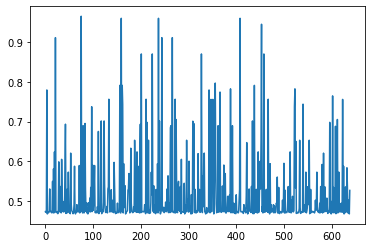

In [21]:
plt.plot(preds)

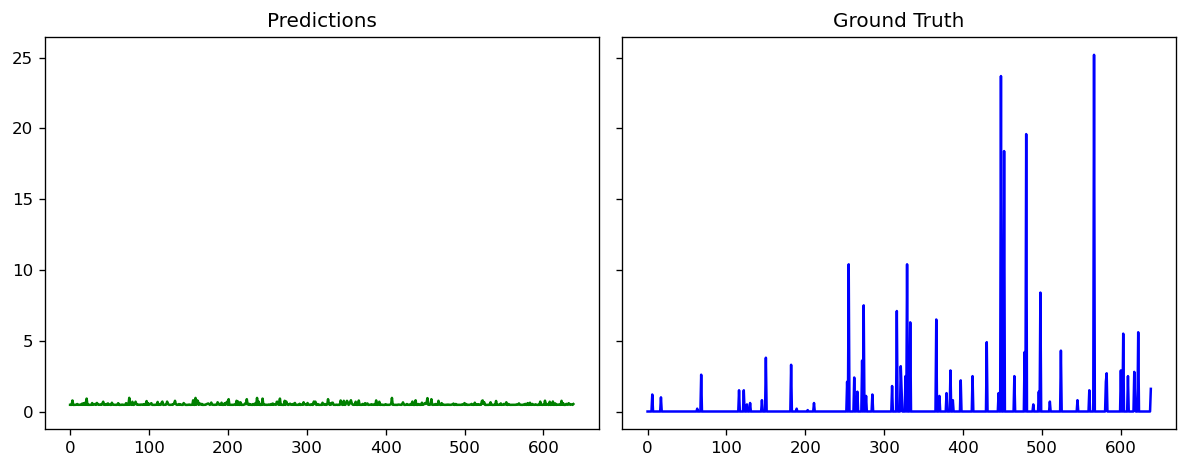

In [22]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

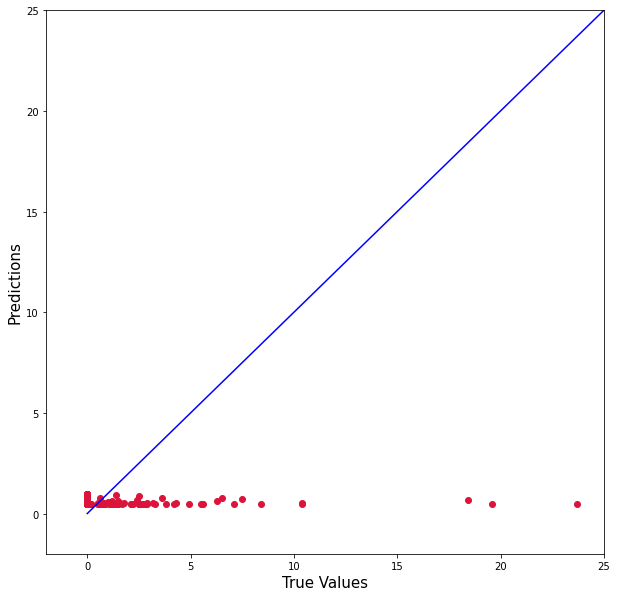

In [23]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_predicted_precipitation_testing.pdf')

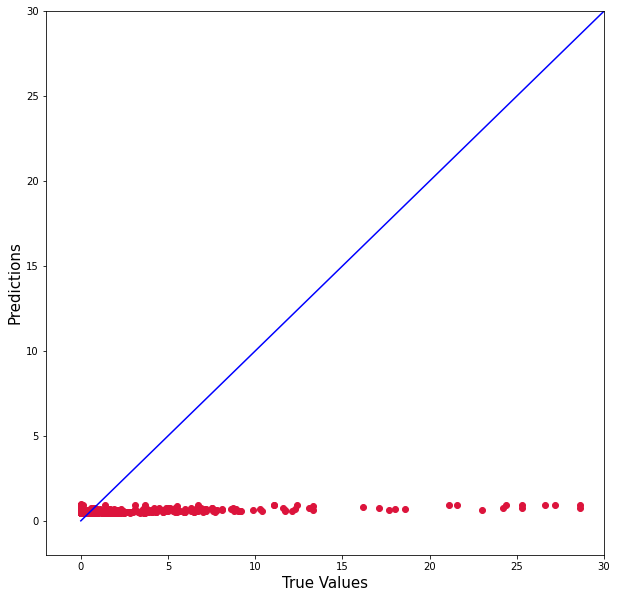

In [24]:

predicted_value = model.predict(X_train)
true_value = y_2_train
fig = plt.figure(figsize=(10,10))

plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 30])
plt.ylim([-2, 30])
plt.show()

fig.savefig('predictions_vs_true_predicted_precipitation_training.pdf')

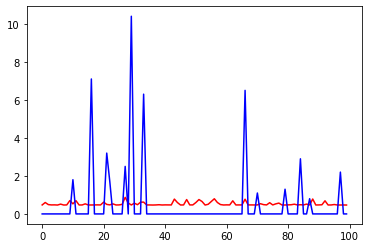

In [25]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[300:400],'r', label='Prediction')
plt.plot(temp_true[300:400],'b', label='Ground Truth')
plt.show()

In [26]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
import keras
from keras.layers import Dense
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(12, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='Adam', metrics='mse', )
model.fit(X_train, y_2_train, validation_data=(X_test, y_2_test), verbose=1, epochs=300, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)


Epoch 1/300
40/40 [==============================] - 1s 7ms/step - loss: 7.9694 - mse: 7.9694 - val_loss: 4.1715 - val_mse: 4.1715
Epoch 2/300
40/40 [==============================] - 0s 3ms/step - loss: 7.9229 - mse: 7.9229 - val_loss: 4.1352 - val_mse: 4.1352
Epoch 3/300
40/40 [==============================] - 0s 3ms/step - loss: 7.8440 - mse: 7.8440 - val_loss: 4.0940 - val_mse: 4.0940
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 7.7485 - mse: 7.7485 - val_loss: 4.0755 - val_mse: 4.0755
Epoch 5/300
40/40 [==============================] - 0s 5ms/step - loss: 7.6669 - mse: 7.6669 - val_loss: 4.0881 - val_mse: 4.0881
Epoch 6/300
40/40 [==============================] - 0s 7ms/step - loss: 7.5998 - mse: 7.5998 - val_loss: 4.1187 - val_mse: 4.1187
Epoch 7/300
40/40 [==============================] - 0s 6ms/step - loss: 7.5652 - mse: 7.5652 - val_loss: 4.1619 - val_mse: 4.1619
Epoch 8/300
40/40 [==============================] - 0s 4ms/step - loss: 7.5389 - m

Epoch 125/300
40/40 [==============================] - 0s 2ms/step - loss: 7.2717 - mse: 7.2717 - val_loss: 4.4139 - val_mse: 4.4139
Epoch 126/300
40/40 [==============================] - 0s 3ms/step - loss: 7.2601 - mse: 7.2601 - val_loss: 4.4239 - val_mse: 4.4239
Epoch 127/300
40/40 [==============================] - 0s 3ms/step - loss: 7.2748 - mse: 7.2748 - val_loss: 4.3877 - val_mse: 4.3877
Epoch 128/300
40/40 [==============================] - 0s 3ms/step - loss: 7.2626 - mse: 7.2626 - val_loss: 4.4152 - val_mse: 4.4152
Epoch 129/300
40/40 [==============================] - 0s 3ms/step - loss: 7.2499 - mse: 7.2499 - val_loss: 4.4009 - val_mse: 4.4009
Epoch 130/300
40/40 [==============================] - 0s 3ms/step - loss: 7.2526 - mse: 7.2526 - val_loss: 4.4216 - val_mse: 4.4216
Epoch 131/300
40/40 [==============================] - 0s 3ms/step - loss: 7.2587 - mse: 7.2587 - val_loss: 4.4198 - val_mse: 4.4198
Epoch 132/300
40/40 [==============================] - 0s 3ms/step - 

Epoch 248/300
40/40 [==============================] - 0s 3ms/step - loss: 6.8310 - mse: 6.8310 - val_loss: 4.7413 - val_mse: 4.7413
Epoch 249/300
40/40 [==============================] - 0s 3ms/step - loss: 6.8418 - mse: 6.8418 - val_loss: 4.6695 - val_mse: 4.6695
Epoch 250/300
40/40 [==============================] - 0s 4ms/step - loss: 6.8213 - mse: 6.8213 - val_loss: 4.6275 - val_mse: 4.6275
Epoch 251/300
40/40 [==============================] - 0s 3ms/step - loss: 6.8200 - mse: 6.8200 - val_loss: 4.7889 - val_mse: 4.7889
Epoch 252/300
40/40 [==============================] - 0s 4ms/step - loss: 6.8183 - mse: 6.8183 - val_loss: 4.7008 - val_mse: 4.7008
Epoch 253/300
40/40 [==============================] - 0s 4ms/step - loss: 6.8174 - mse: 6.8174 - val_loss: 4.6865 - val_mse: 4.6865
Epoch 254/300
40/40 [==============================] - 0s 3ms/step - loss: 6.8134 - mse: 6.8134 - val_loss: 4.7141 - val_mse: 4.7141
Epoch 255/300
40/40 [==============================] - 0s 3ms/step - 

In [28]:
mean_squared_error(y_2_test, preds)

4.923093554775385

In [29]:
mean_absolute_error(y_2_test, preds)

0.7754346468592287

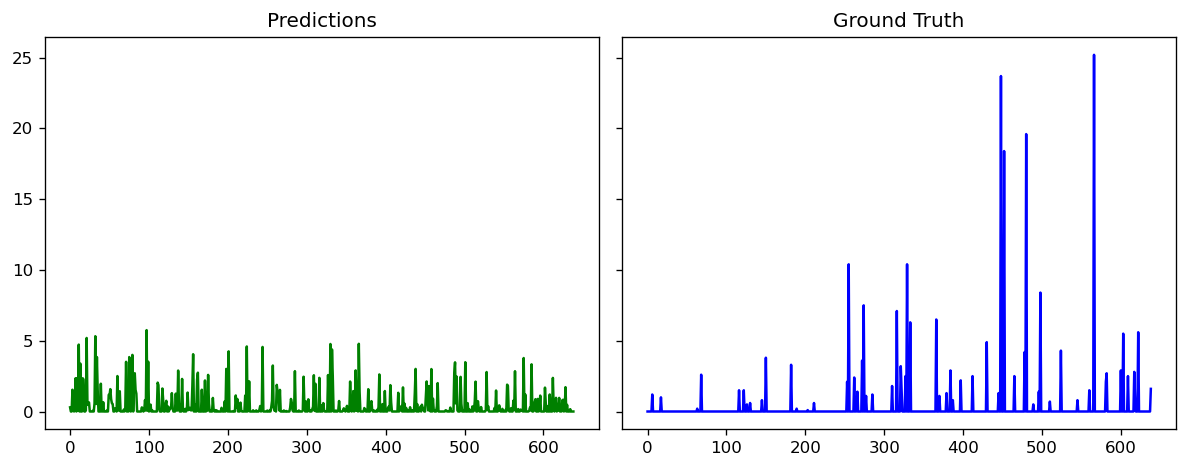

In [30]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [31]:
classifier.feature_importances_

array([ 23,  16,  27,  10,  11,  46,  21,  36,  16,  35,  47,  21,  41,
        29,  54,  24,  53,  19,  21,  55, 168, 127])

In [32]:
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']

<BarContainer object of 22 artists>

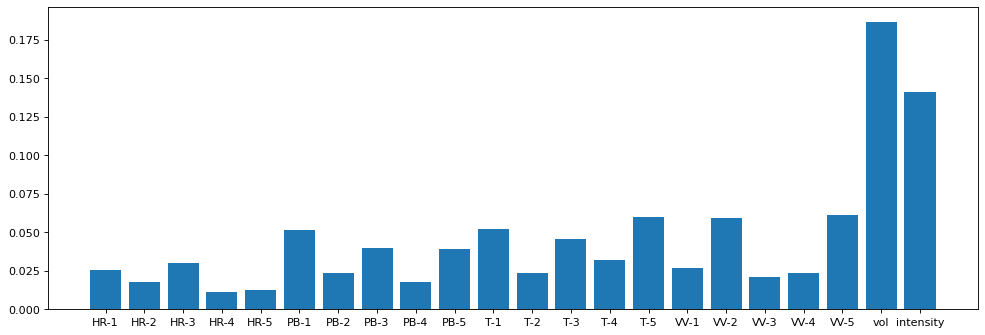

In [33]:
plt.figure(figsize=(15, 5), dpi=80)

plt.bar(features, classifier.feature_importances_ / np.sum(classifier.feature_importances_))

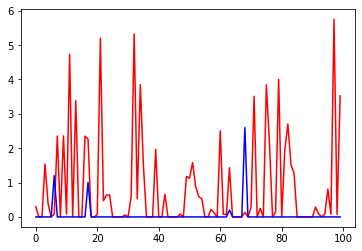

In [34]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[0:100],'r', label='Prediction')
plt.plot(temp_true[0:100],'b', label='Ground Truth')
plt.show()

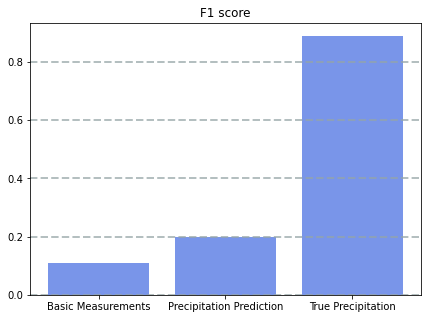

In [35]:
data = [0.11, 0.198, 0.89]

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

x = ['Basic Measurements', 'Precipitation Prediction', 'True Precipitation']
plt.xticks(range(len(data)), x)

plt.bar(range(len(x)), data, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("F1 score")
plt.show()

<AxesSubplot:xlabel='importance', ylabel='features'>

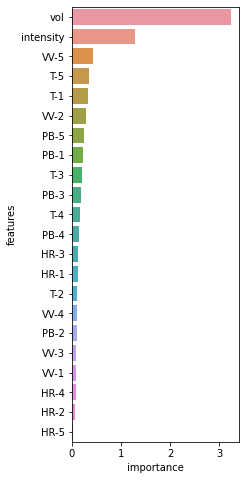

In [36]:
# plot feature importance
import seaborn as sns
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']
fi_df = pd.DataFrame(features, columns=['features'])
fi_df['importance'] = classifier.booster_.feature_importance(importance_type="gain") / 15000
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
sns.barplot(
    x='importance'
    , y='features'
    , data=fi_df.sort_values(by=['importance'], ascending=False)
    , ax=ax
)

In [39]:
fig.savefig("feature_importance_predicted_precipitation.pdf",bbox_inches='tight')